## Customer Churn Prediction - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Data Preparation
- Download the data and read with pandas
- Look at the data
- Unified the format of columns name and values for categorical columns
- Investigate missing values
- Check if the churn variable needs any cleaning

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# Convert columns name to lower case and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Identify categorical columns in the dataframe
categorical_col = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_col:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
# View the records of long table in column format
df.head().T

0             1               2  \
customerid              7590-vhveg    5575-gnvde      3668-qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month-to-month      one_year  month-to-month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795-cfocw        9237-hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month-to-month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


totalcharges column is still read as a text columns. Need to clean and convert to numerical format. The reason is that there are values in this column which has been ommited and replaced with '_'. Pandas cannot convert this to numeric value. Will need to replace them with 0.

In [7]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

In [8]:
df['totalcharges'].isnull().sum()

np.int64(0)

In [9]:
# Inspect the 'churn' variable
df['churn'].value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [10]:
# Convert the churn value from yes/no to numeric 1/0
df['churn'] = (df['churn'] == 'yes').astype(int)

In [11]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

#### 3.2 Setting up validation framework
Using sci-kit learn package to split train/validation/test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# further split the train dataset into train and validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [16]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

#### 3.3 EDA
- Check for missing value
- Look at the target variable
- Look at numerical and categorical variables

In [17]:
df_full_train = df_full_train.reset_index(drop=True)

Check the train data set for any missing values. There are no columns with missing values so we dont have to do any cleaning step here.

In [18]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Next, we investigate the target variable 'churn'. The split is roughly 70:30. The churn rate is about 27%.

In [19]:
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

Next, we split the numerical columns from categorical columns.

In [20]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [col for col in df_full_train.columns if col not in numerical]
categorical.remove('churn')
categorical.remove('customerid')

In [21]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### 3.4 Feature Importance: Churn Rate and Risk Ratio

1. *Churn rate*: Difference between the global mean of the target variable (global churn rate) and mean of the target variable for categories of a feature. If this difference is greater than 0, it means that this group is more likely to churn and vice versa. The larger the difference, the more important/useful the categorical variable can be used in predicting the churn rate.

2. *Risk ratio*: Ratio between the mean of the target variable for caegories of a feature and global mean of target variable. If this ratio is greater than 1, the category is more likely to churn, and vice versa. It is another way of expressing the feature importance / usefulness in predicting churn rate.

In [22]:
global_churn = df_full_train['churn'].mean()
global_churn

np.float64(0.26996805111821087)

In [23]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [24]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [25]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [26]:
churn_partner/global_churn

np.float64(0.7594724924338315)

In [27]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980



seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208



partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472



dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651



phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412



multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948



internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201



onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570



onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660



deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480



techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390



streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328



streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182



contract


mean  count      diff      risk
contract                                           
month-to-month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730



paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560



paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

#### 3.5 Feature importance: Mutual Information
Mutual information is a concept from information theory. It tells us how much we can learn about one variable if we know the value of other variable. We can use sklearn package to calculate the mutual information score bewteen the target variable and other categorical variables to find out which feature is more important in predicting the target.

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
# Calculate the mi score between churn and gender
# Similar to the churn rate difference based on gender, the mi score between gender and churn is very low, showing that gender will not be useful in predicting churn rate
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [30]:
# The mi score between churn and contractype is much more significant
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [31]:
# Interestingly, the mi score for churn itself is not 1 but only 0.58. 
# However, this is significantly high by 1 order of magnitude comapred to contracttype
mutual_info_score(df_full_train.churn, df_full_train.churn)

0.5832270604600812

In [32]:
def mi_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [33]:
mi = df_full_train[categorical].apply(mi_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In the order of improtance, contract, online security, techsupport for examples are more important and provide more information in predicting churn rate. In the opposite, gender and phoneservice offer very little information for churn prediction.

#### 3.6 Feature Importance: Correlation
Correlation coefficient is another way to show how variables move relatively to each other. The coefficient is between -1 <= r <= 1. A positive r means two variables moves in the same direction. When r = 0, it means that two variables do no move together and not correlated (independent).

In [34]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

- Tenure and churn has correlation coefficient of -0.35. As tenure increases, churn rates will decrease.
- Monthly charges positively correlate with churn rate. Higher monthly charge will lead to higher churn.

#### 3.7 One-hot encoding

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
dv = DictVectorizer(sparse=False)

# Convert the training dataframe into a dictionary 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Apply the encoder to the validation data
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#### 3.8 Logistic Regression

Similar to linear regression, logistic regression use a model to transform the independent features (X) to approximate the value of target variable (y). In the logistic regression outcome, the target is binary. The output of the model is probability of xi belonging to the positive class. 

Logistic regerssion, similar to linear regerssion, takes into account the bias term and weighted sum of all features. The output of logistic regression is passed into the signmoid function, which transform the score into a probablity between 0 and 1.

In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [39]:
sigmoid(10000)

np.float64(1.0)

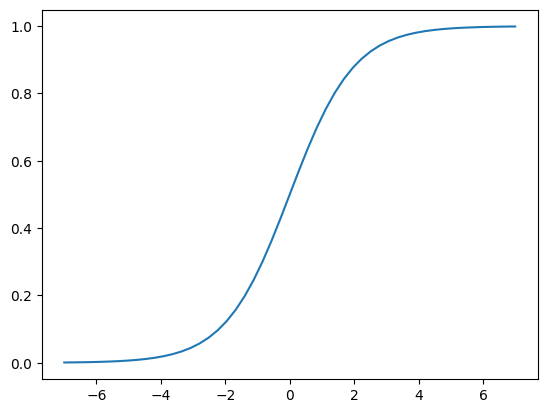

In [40]:
plt.plot(z, sigmoid(z))

In [41]:
def linear_regression(xi):
    result = w0

    for j in range(len(xi)):
        result += xi[j] * w[j]

    return result

In [42]:
def logistic_regression(xi):
    score = w0

    for j in range(len(xi)):
        score += xi[j] + w[j]
    return sigmoid(score)

#### 3.9 Implement Logistic Regression with Sklearn

In [43]:
from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
model.intercept_[0]

np.float64(-0.10913176644533581)

In [54]:
# For a hard prediction, use predict fucntion of LogisticRegression
y_pred_hard = model.predict(X_val)
y_pred_hard

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [55]:
# For soft prediction (final result showing probability of each prediction), use predict_proba
# Soft prediction is prefered when we need the probability to make our own decision, sometime the cut-off is not necessarily 0.5

y_pred = model.predict_proba(X_val)[:, 1]

In [56]:
churn_decision = (y_pred >= 0.5)

In [57]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

#### 3.10 Model Interpretation

In [62]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.089),
 'onlinesecurity=yes'

To better explain the model, we train a smaller version of it with fewer features and see the result.

In [63]:
small = ['contract', 'tenure', 'monthlycharges']

In [64]:
df_train[small].head()

contract  tenure  monthlycharges
3897        two_year      72          115.50
1980  month-to-month      10           95.25
6302  month-to-month       5           75.55
727   month-to-month       5           80.85
5104        two_year      18           20.10

In [67]:
# One-hot enconding the df

dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [66]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [68]:
X_train_small = dv_small.transform(dicts_train_small)

In [69]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [70]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595284362)

In [73]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

#### 3.11 Using the model
We train the model using full train data set and apply the model to the test data set to see the accuracy of prediction.

In [74]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [79]:
y_full_train = df_full_train.churn.values

In [80]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [81]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [83]:
X_test = dv.transform(dicts_test)

In [84]:
y_pred = model.predict_proba(X_test)[:, 1]

In [85]:
churn_decision = (y_pred >= 0.5)

In [86]:
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)